# Heart Disease Classification

### Dataset Source: 
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Dataset Description:
- This Dataset contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 
- In particular, the Cleveland Dataset is the only one that has been used by ML researchers to  this date. 
- The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Dataset Columns:
**age**: The person’s age in years

**sex**: The person’s sex (1 = male, 0 = female)

**cp**: chest pain type
- Value 0: asymptomatic
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina

**trestbps**: The person’s resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person’s cholesterol measurement in mg/dl

**fbs**: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: resting electrocardiographic results
- Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
- Value 1: normal
- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**thalach**: The person’s maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment 
- Value 0: downsloping
- Value 1: flat
- Value 2: upsloping

**ca**: The number of major vessels (0–3)

**thal**: A blood disorder called thalassemia 
- Value 0: NULL (dropped from the dataset previously
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

**target**: 
Heart Disease (1 = no, 0 = yes)

# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

# Accuracy Calculation
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

# 1. Data Pre-Processing

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.describe()
num_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### No Null Values
- This dataset has 0 null values.

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Skew Checking

In [25]:
for i in df.columns:
    print(i, " = ", df[i].skew())

age  =  -0.2024633654856539
sex  =  -0.791335191480832
cp  =  0.48473236883889675
trestbps  =  0.7137684379181465
chol  =  1.1434008206693387
fbs  =  1.986651930914452
restecg  =  0.16252224492761935
thalach  =  -0.5374096526832253
exang  =  0.7425315444212832
oldpeak  =  1.269719930601997
slope  =  -0.5083156098165442
ca  =  1.3104221354767875
thal  =  -0.47672219490975737
target  =  -0.17982105403495655


# 2. Exploratory Data Analysis (EDA)
### Univariate Analysis - Histogram
- Histogram is used for all features, because all features have been encoded into numeric values in the dataset. 

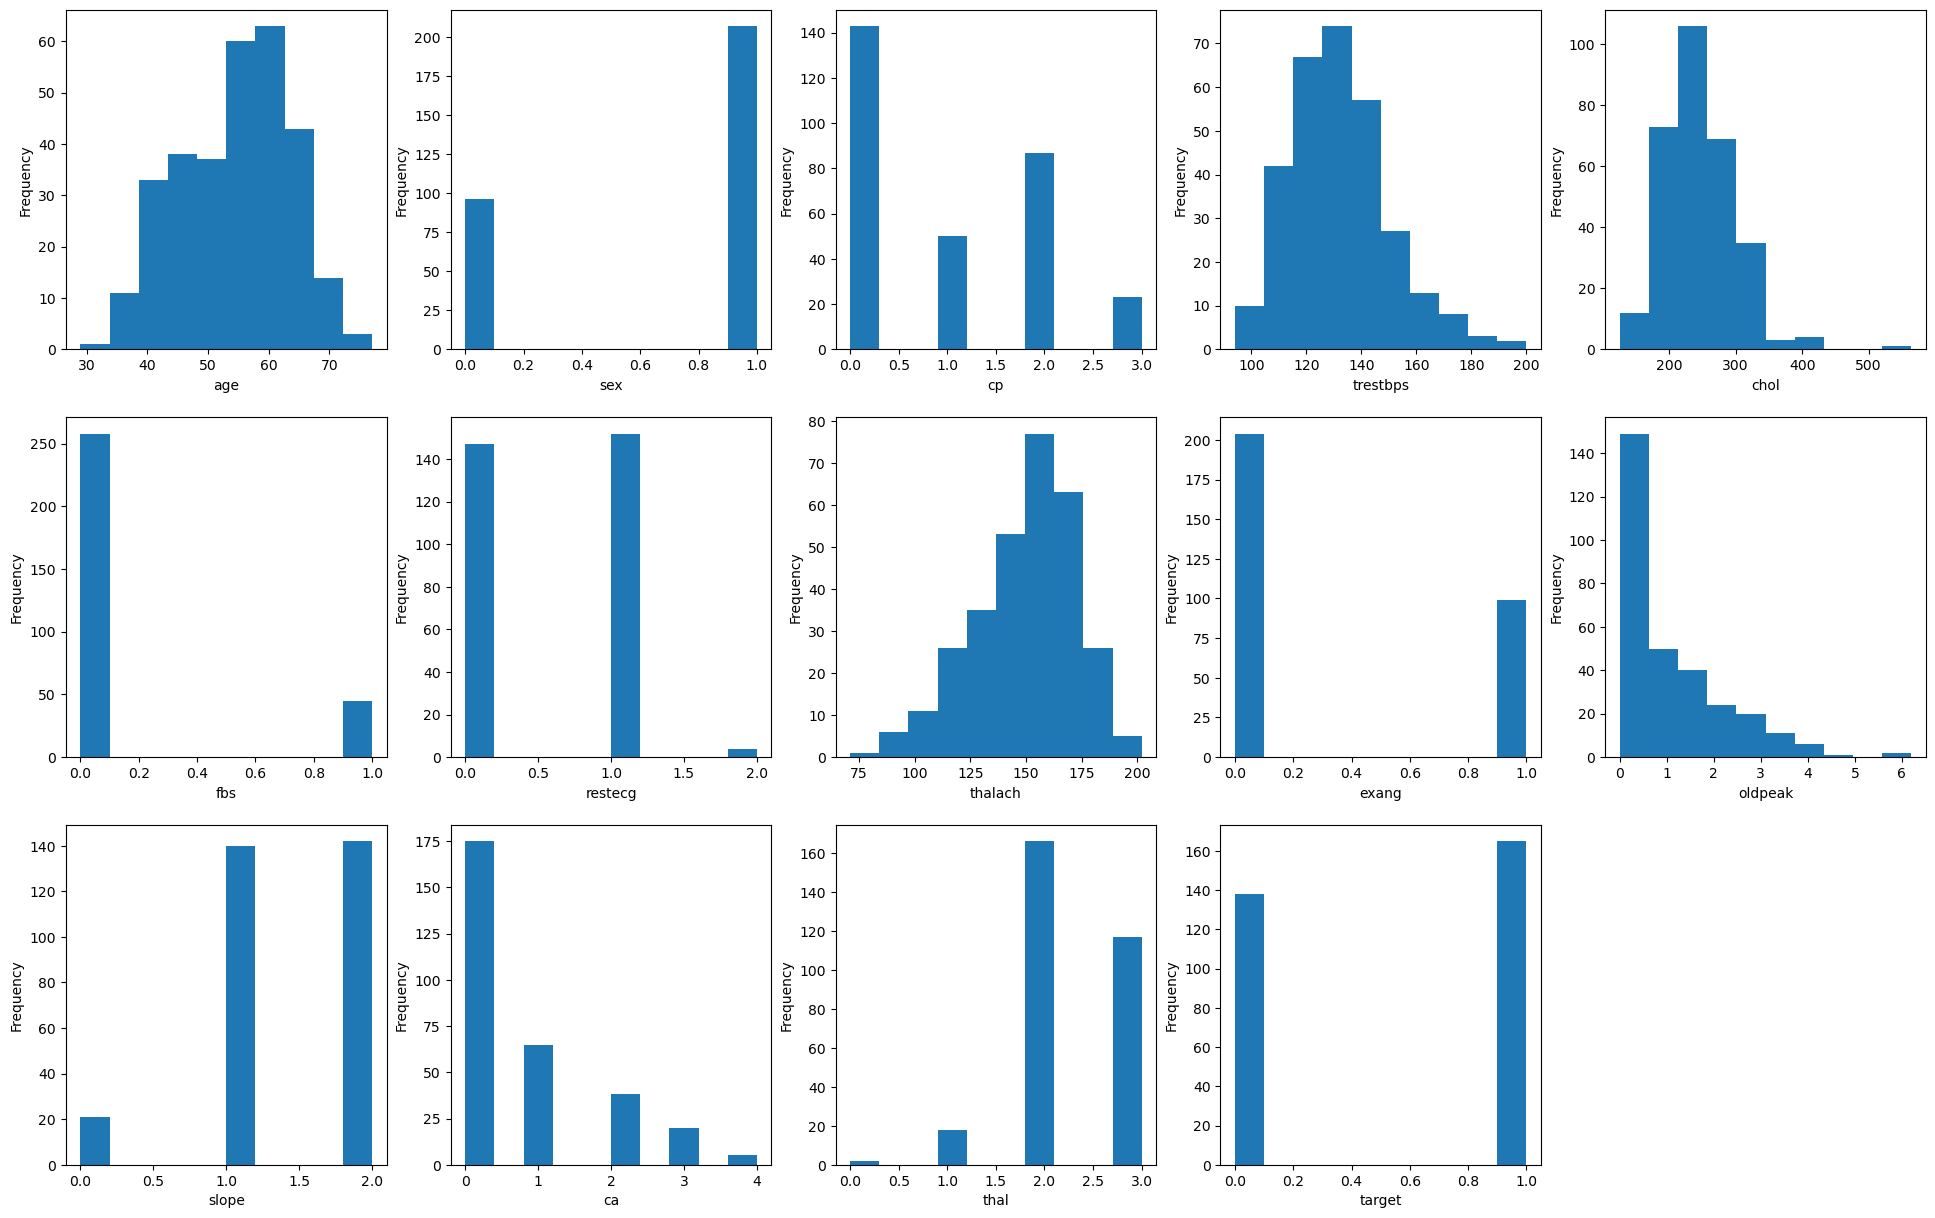

In [7]:
fig = plt.figure(figsize=(24, 15))
i = 0
for column in df:
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(column)
    df[column].plot(kind = 'hist')
    i = i + 1

### Categorical Features vs. Target - Grouped Bar Chart
- To show how the categorical value weigh in determining the target value, grouped bar chart is a straightforward representation. 

- For example, sex = 1 and sex = 0 have distinctly distribution of target value, which indicates it is likely to contribute more to the prediction of the target. 
- Contrarily, if the target distribution is the same regardless of the categorical features, then it is very likely they are not correlated.

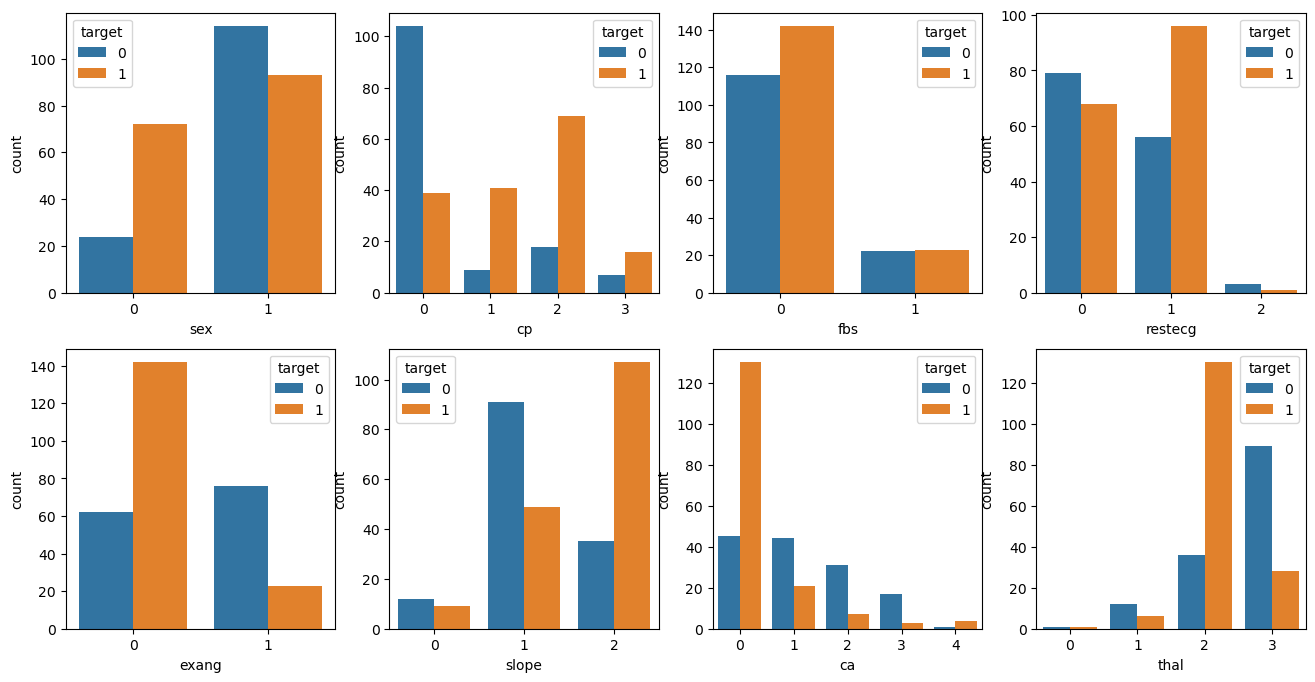

In [8]:
cat_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize = (16,8))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    chart = sns.countplot(data = df, x = column, hue = 'target')

### Numerical Features vs. Target - Box Plot
- Box plot shows how the values of numerical features varies across target groups. 

- For example, we can tell that “oldpeak” have distinct difference when target is 0 vs. target is 1, suggesting that it is an important predictor. 
- However, ‘trestbps’ and ‘chol’ appear to be less outstanding, as the box plot distribution is similar between target groups.

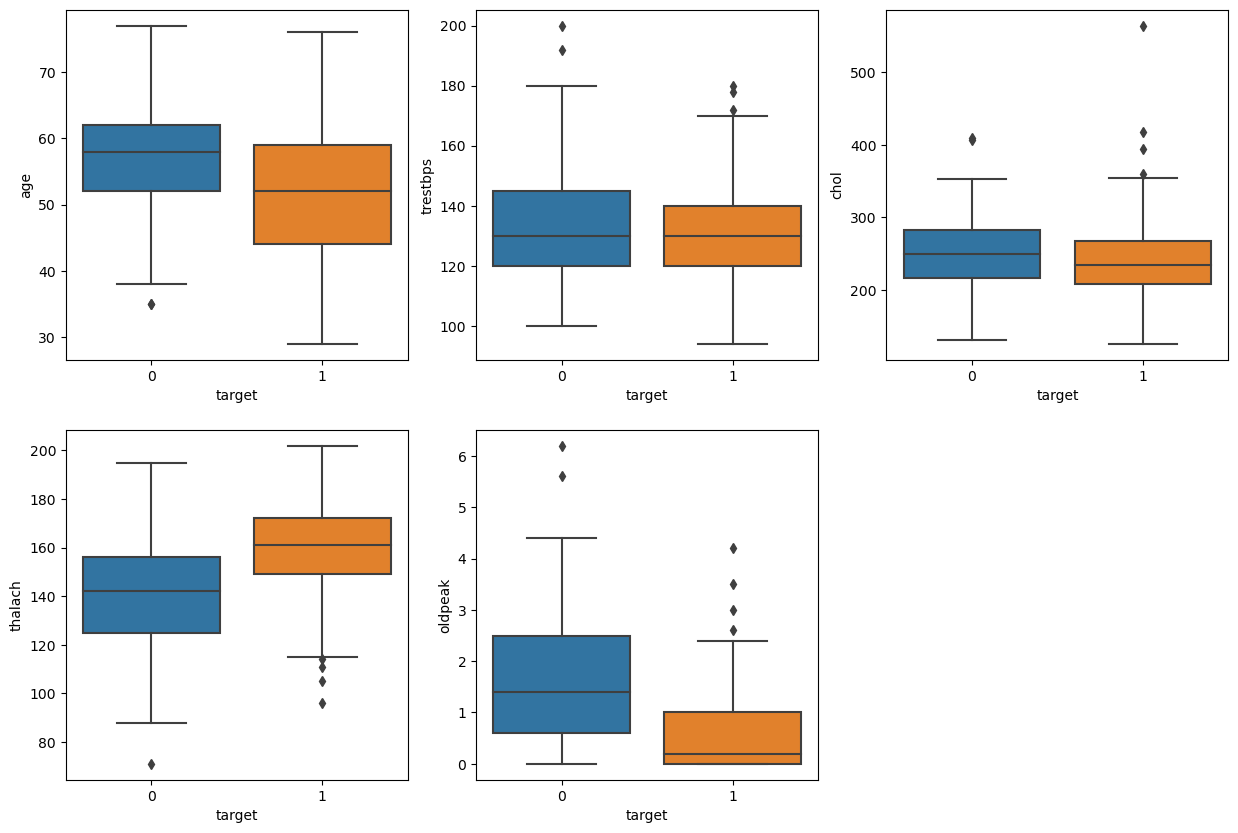

In [9]:
num_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize = (15,10))

for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(x = 'target', y = column, data = df)

# 3. Feature Engineering

### Univariate Selection
- Univariate Selection is a statistical tests that may be used to pick certain features that have the best relationship to the performance variable,

- SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests,

- The following example uses the chi-squared statistical test for non-negative features to select 10 of the best features.

In [10]:
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


### Feature Importance
- Feature Importance can help us gain the significance of each feature of the dataset by using the Model Characteristics property,

- Feature value gives us a score for every function of the results, the higher the score the more significant or appropriate the performance variable is,

- Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.

[0.071455   0.05587731 0.12656527 0.06114028 0.0588813  0.01966949
 0.03424055 0.0925367  0.0987585  0.08267122 0.07272384 0.12541374
 0.10006682]


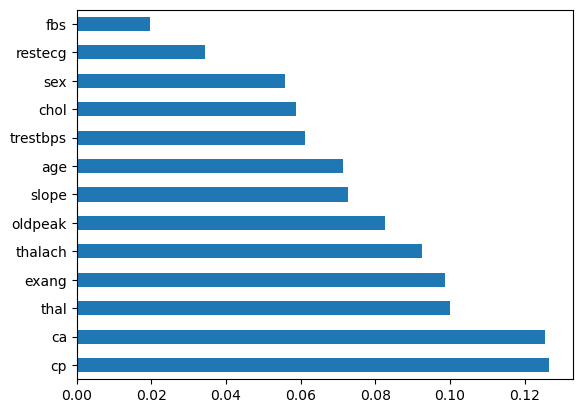

In [11]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers

#Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

### Correlation Matrix 
- Correlation Matrix indicates how the features are related to each other or to the target variable,

- The correlation may be positive which increase in one value of the feature increases the value of the target variable or negative where it increase in one value of the feature decreases the value of the target variable,

- Heatmap makes it easy to classify the features who are the most relevant to the target variable.

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


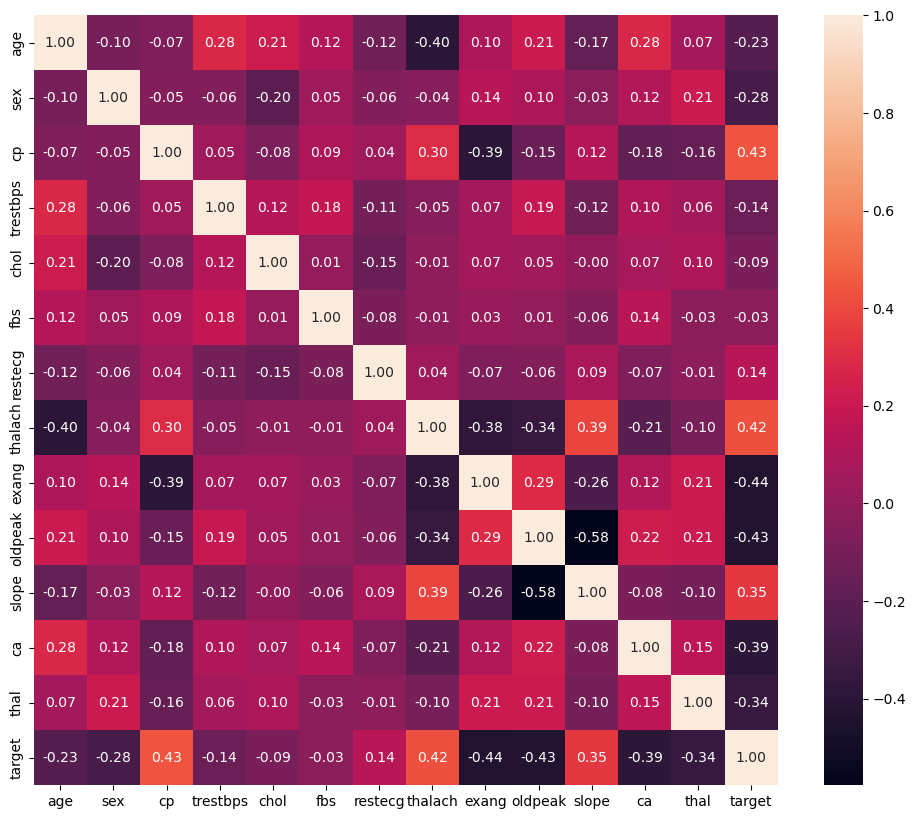

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

for i in df.columns:
    print(i,len(df[i].unique()))

# 4. Splitting the Dataset into Training and Testing Set

- Classification algorithm falls under the category of supervised learning

- Dataset needs to be split into a subset for training and a subset for testing. 

- The Models are trained on the training set and then examined using the testing set.

In [13]:
X = df.drop(['target'], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 5. Modelling and Performance Measure

### K-Nearest Neighbour (KNN)

<img src="knearest.jpg">

- This algorithm can represent each data point in a n dimensional space, which is defined by n features. 

- It calculates the distance between one point to another, then assign the label of unobserved data based on the labels of nearest observed data points.

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        42
           1       0.71      0.71      0.71        58

    accuracy                           0.66       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.66      0.66      0.66       100



0.6510673234811165

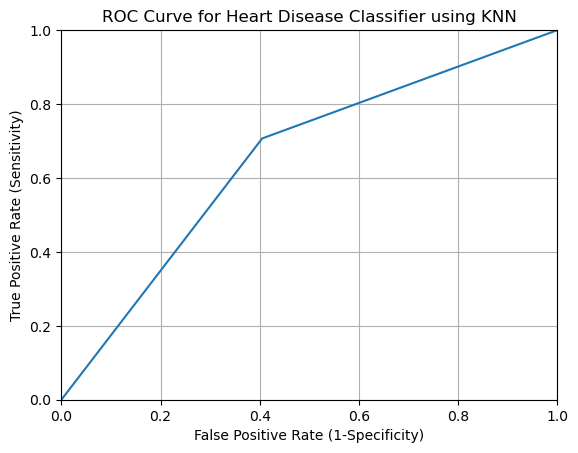

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease Classifier using KNN')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
sklearn.metrics.roc_auc_score(y_test,y_pred)

### Naïve Bayes

<img src="naivebayes.jpg">

- Naïve Bayes is based on Bayes’ Theorem, which is an approach to calculate conditional probability based on prior knowledge, and the naïve assumption that each feature is independent to each other. 

- The biggest advantage of Naive Bayes is that, while most machine learning algorithms rely on large amount of training data, it performs relatively well even when the training data size is small. 

- Gaussian Naïve Bayes is a type of Naïve Bayes Classifier that follows the normal distribution.

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        42
           1       0.90      0.79      0.84        58

    accuracy                           0.83       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.84      0.83      0.83       100



0.8370279146141215

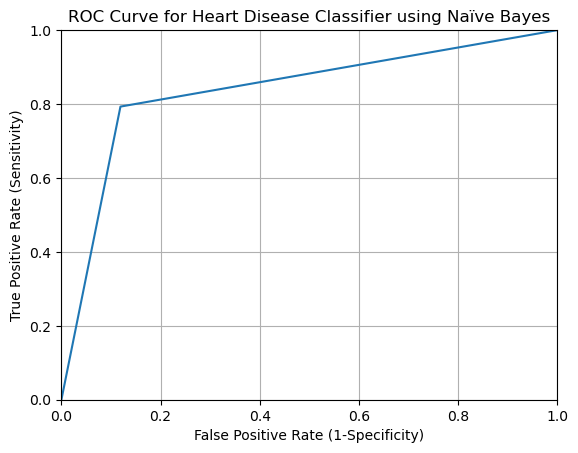

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Heart Disease Classifier using Naïve Bayes')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
sklearn.metrics.roc_auc_score(y_test,y_pred)

### Model Pipeline
In order to create a pipeline, we append the default state of all classification algorithms into the model list and then iterate through them to train, test, predict and evaluate.

In [20]:
model_pipeline = []
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

### Performance Measure

Below is an abstraction explanation of commonly used evaluation methods for classification models — accuracy, ROC & AUC and confusion matrix. Each of the following metrics is worth diving deeper

**1. Accuracy**

Accuracy is the most straightforward indicator of the model performance. It measure the percentage of accurate predictions: 

- **accuracy = (true positive + true negative) / (true positive + false positive + false negative + false positive)**

**2. ROC & AUC**

- ROC is the plot of **true positive rate against false positive rate** at various classification threshold. 
- AUC is the area under the ROC curve, and higher AUC indicates better model performance.

**3. Confusion Matrix** 

Confusion Matrix indicates the actual values vs. predicted values and summarize the **true negative, false positive, false negative and true positive values** in a matrix format.

In [21]:
model_list = ['K-Nearest Neighbors', 'Naïve Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))

In [22]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,K-Nearest Neighbors,0.66,0.65
1,Naïve Bayes,0.83,0.84


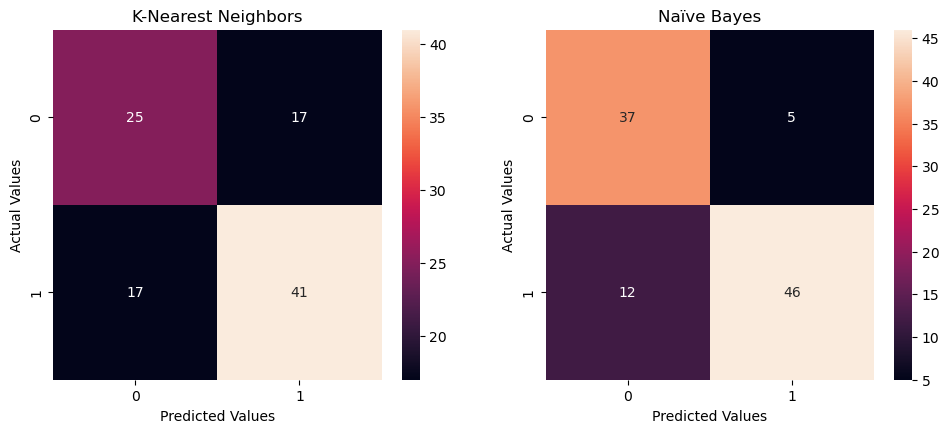

In [23]:
fig = plt.figure(figsize = (18, 10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True)
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

# 6. Conclusion

Based on three evaluations methods above, Naïve Bayes have the best performance, whereas K Nearest Neighbors is not doing well. 

However, this doesn’t mean that Naïve Bayes are the superior algorithm. We can only say that, they are more suitable for this dataset where the size is relatively smaller and data is not at the same scale.

Each algorithm has its own preference and require different data processing and feature engineering techniques.

For example, K Nearest Neighbors is sensitive to features at difference scale. 

Understanding the characteristics of each allows us to balance the trade-off and select the appropriate model according to the dataset.